![title](dataflow.png)

![title](dataflow1.png)

## CODE

In [93]:
import pickle 
import numpy as np 

In [94]:
with open ('train_qa.txt', 'rb') as fp:
    train_data = pickle.load(fp)

In [95]:
with open ('test_qa.txt', 'rb') as fp:
    test_data = pickle.load(fp)

In [2]:
import pandas as pd

In [4]:
df = pd.read_pickle('test_qa.txt')

In [5]:
df1 = pd.read_pickle('train_qa.txt')

In [101]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [102]:
' '.join(test_data[0][0])

'Mary got the milk there . John moved to the bedroom .'

In [103]:
type(test_data)

list

In [104]:
type(train_data)

list

In [105]:
len(train_data)

10000

In [106]:
len(test_data)

1000

In [107]:
# Vocabulary Assigning
vocab = set()

In [108]:
all_data = test_data + train_data

In [109]:
type(all_data)

list

In [111]:
# Add to Vocabulary
for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [112]:
vocab.add('yes')
vocab.add('no')

In [113]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [114]:
len(vocab)

37

In [115]:
vocab_len = len(vocab) + 1

In [116]:
max_story_len = max([len(data[0]) for data in all_data])
max_story_len

156

In [117]:
max_ques_len = max([len(data[1]) for data in all_data])
max_ques_len

6

In [118]:
# Import packages
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [119]:
tokenizer = Tokenizer(filters=[])

In [120]:
tokenizer.fit_on_texts(vocab)

In [122]:
tokenizer.word_index

{'milk': 1,
 'took': 2,
 'bedroom': 3,
 'got': 4,
 'john': 5,
 'apple': 6,
 'back': 7,
 'put': 8,
 'to': 9,
 'grabbed': 10,
 'yes': 11,
 'travelled': 12,
 'garden': 13,
 'down': 14,
 'up': 15,
 'there': 16,
 'kitchen': 17,
 'journeyed': 18,
 'in': 19,
 'is': 20,
 'picked': 21,
 'went': 22,
 'mary': 23,
 'daniel': 24,
 '?': 25,
 'football': 26,
 'sandra': 27,
 'left': 28,
 'no': 29,
 'hallway': 30,
 'dropped': 31,
 'the': 32,
 'office': 33,
 'moved': 34,
 '.': 35,
 'bathroom': 36,
 'discarded': 37}

In [123]:
# Training data split
train_story_text = []
train_question_text = []
train_answers = []


for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [124]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [125]:
len(train_story_text)

10000

In [126]:
len(train_story_seq)

10000

In [127]:
def vectorize_stories(data, word_index = tokenizer.word_index,
                     max_story_len = max_story_len, max_ques_len = max_ques_len):

    X = [] #Stories
    Xq = [] #Query/Question
    Y = [] #correct answer

    for story, query, answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index) + 1)
        y[word_index[answer]] = 1


        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
        # print (Y)
        
    return(pad_sequences(X, maxlen= max_story_len) ,
          pad_sequences(Xq, maxlen= max_ques_len) ,
          np.array(Y))

In [128]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [129]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [130]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [131]:
inputs_test

array([[ 0,  0,  0, ..., 32,  3, 35],
       [ 0,  0,  0, ..., 32, 13, 35],
       [ 0,  0,  0, ..., 32, 13, 35],
       ...,
       [ 0,  0,  0, ..., 32,  6, 35],
       [ 0,  0,  0, ..., 32, 13, 35],
       [ 0,  0,  0, ...,  6, 16, 35]])

In [132]:
inputs_train

array([[ 0,  0,  0, ..., 32,  3, 35],
       [ 0,  0,  0, ..., 32, 30, 35],
       [ 0,  0,  0, ..., 32, 36, 35],
       ...,
       [ 0,  0,  0, ..., 32,  3, 35],
       [ 0,  0,  0, ...,  1, 16, 35],
       [ 0,  0,  0, ...,  6, 16, 35]])

In [133]:
queries_test

array([[20,  5, 19, 32, 17, 25],
       [20,  5, 19, 32, 17, 25],
       [20,  5, 19, 32, 13, 25],
       ...,
       [20, 23, 19, 32,  3, 25],
       [20, 27, 19, 32, 13, 25],
       [20, 23, 19, 32, 13, 25]])

In [134]:
queries_train

array([[20, 27, 19, 32, 30, 25],
       [20, 24, 19, 32, 36, 25],
       [20, 24, 19, 32, 33, 25],
       ...,
       [20, 27, 19, 32, 30, 25],
       [20, 23, 19, 32, 17, 25],
       [20, 23, 19, 32,  3, 25]])

In [135]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [136]:
answers_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [137]:
tokenizer.word_index['yes']

11

In [138]:
tokenizer.word_index['no']

29

In [139]:
# Import Models
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [140]:
input_sequence = Input((max_story_len,))
question = Input((max_ques_len,))

In [141]:
# input encoder m
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim= vocab_len, output_dim= 64))
input_encoder_m.add(Dropout(0.3))

In [142]:
# input_encoder_c
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim= vocab_len, output_dim= max_ques_len))
input_encoder_c.add(Dropout(0.3))

In [143]:
# question_encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim= vocab_len, output_dim= 64, input_length= max_ques_len))
question_encoder.add(Dropout(0.3))

In [144]:
# question_encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim= vocab_len, output_dim= 64, input_length= max_ques_len))
question_encoder.add(Dropout(0.3))

In [145]:
# Encode the sequences 

input_encoded_m = input_encoder_m(input_sequence)

input_encoded_c = input_encoder_c(input_sequence)

question_encoded = question_encoder(question)

In [146]:
input_encoded_m[0]

<KerasTensor: shape=(156, 64) dtype=float32 (created by layer 'tf.__operators__.getitem_1')>

In [147]:
match = dot([input_encoded_m, question_encoded], axes= (2,2))
match = Activation('softmax')(match)

In [148]:
response = add([match, input_encoded_c])
response = Permute((2,1))(response)

In [149]:
#Concatenate 
answer = concatenate([response, question_encoded])

In [150]:
answer = LSTM(32)(answer)

In [151]:
#regularise with the dropout
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [152]:
answer = Activation('softmax')(answer)

In [153]:
model = Model([input_sequence, question], answer)
model.compile(optimizer= 'rmsprop', loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [154]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_4 (Sequential)      (None, None, 64)     2432        ['input_3[0][0]']                
                                                                                                  
 sequential_7 (Sequential)      (None, 6, 64)        2432        ['input_4[0][0]']                
                                                                                            

In [155]:
history = model.fit([inputs_train, queries_train], answers_train,
                    batch_size = 32, epochs = 20, validation_data = ([inputs_test, queries_test], answers_test)
                    )

Epoch 1/20
313/313 [==============================] - 9s 20ms/step - loss: 0.8700 - accuracy: 0.5000 - val_loss: 0.6951 - val_accuracy: 0.4970
Epoch 2/20
313/313 [==============================] - 5s 17ms/step - loss: 0.7046 - accuracy: 0.5025 - val_loss: 0.6949 - val_accuracy: 0.4970
Epoch 3/20
313/313 [==============================] - 5s 17ms/step - loss: 0.6985 - accuracy: 0.4965 - val_loss: 0.6961 - val_accuracy: 0.4970
Epoch 4/20
313/313 [==============================] - 6s 18ms/step - loss: 0.6961 - accuracy: 0.5094 - val_loss: 0.6937 - val_accuracy: 0.5030
Epoch 5/20
313/313 [==============================] - 6s 21ms/step - loss: 0.6951 - accuracy: 0.5056 - val_loss: 0.6969 - val_accuracy: 0.4970
Epoch 6/20
313/313 [==============================] - 6s 20ms/step - loss: 0.6957 - accuracy: 0.5028 - val_loss: 0.6939 - val_accuracy: 0.5030
Epoch 7/20
313/313 [==============================] - 6s 19ms/step - loss: 0.6956 - accuracy: 0.5005 - val_loss: 0.6940 - val_accuracy: 0.5030

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Text(0.5, 0, 'epochs')

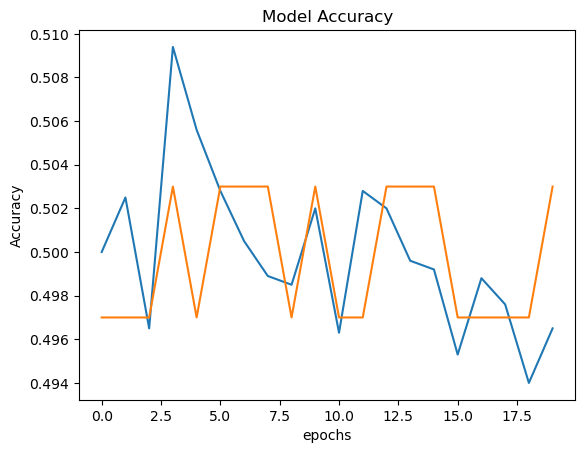

In [180]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')


In [181]:
#save the model
model.save('chatbot model')

INFO:tensorflow:Assets written to: chatbot model\assets


INFO:tensorflow:Assets written to: chatbot model\assets


In [182]:
#Evaluation on the testset 
model.load_weights('chatbot model')

In [183]:
pred_results = model.predict([inputs_test, queries_test])

32/32 [==============================] - 0s 6ms/step


In [184]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [185]:
story = ' '.join(word for word in test_data[10][0])

In [186]:
story

'John moved to the hallway . Sandra went to the bedroom .'

In [187]:
query  = ' '.join(word for word in test_data[10][1])

In [188]:
query

'Is John in the hallway ?'

In [189]:
test_data[10][2]

'yes'

In [190]:
test_data[10][1]

['Is', 'John', 'in', 'the', 'hallway', '?']

In [191]:
val_max = np.argmax(pred_results[13])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print('Predicted answer is', k)
print('Probability of certainity ', pred_results[13][val_max])

Predicted answer is no
Probability of certainity  0.5092362


In [192]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [193]:
story = 'Mary dropped the football . Sandra discarded apple in kitchen '
story.split()

['Mary',
 'dropped',
 'the',
 'football',
 '.',
 'Sandra',
 'discarded',
 'apple',
 'in',
 'kitchen']

In [194]:
my_question = 'Is apple in the kitchen'

In [195]:
my_question.split()

['Is', 'apple', 'in', 'the', 'kitchen']

In [196]:
mydata = [(story.split(), my_question.split(), 'yes')]

In [197]:
mydata

[(['Mary',
   'dropped',
   'the',
   'football',
   '.',
   'Sandra',
   'discarded',
   'apple',
   'in',
   'kitchen'],
  ['Is', 'apple', 'in', 'the', 'kitchen'],
  'yes')]

In [198]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [199]:
pred_results = model.predict(([my_story,my_ques]))

1/1 [==============================] - 0s 37ms/step


In [200]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print('Predicted answer is', k)
print('Probability of certainity ', pred_results[0][val_max])

Predicted answer is no
Probability of certainity  0.508674
